# Análise Exploratória de Dados (EDA) Para Todos Cargos de Dados

## Cargos da Análise

In [1]:
# Importando as bibliotecas
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Carregabdo os dados do dataset do Hugging Face e convertendo o conjunto de treino ('train') em um DataFrame do Pandas
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Fazendo tratamento dos dados para o formato datetime e transformando as habilidades (job_skills) em listas
df['job_posted_dates'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Obtendo informações sobre todas colunas e seus respectivos tipos de dados
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  object        
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
# Contagem do número de postagens de trabalho por cargo e exibição como uma tabela
df_jobs = df['job_title_short'].value_counts().to_frame()

df_jobs

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


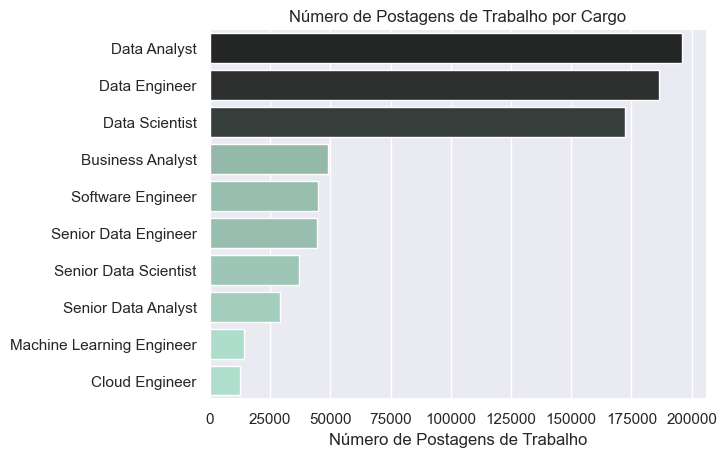

In [4]:
# Selecionando as cores e sua palheta
color =  "#a8e6cf"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

# Produzindo e exibindo a visualização dos dados
sns.set_theme(style='darkgrid')
sns.barplot(data=df_jobs, x='count', y='job_title_short', hue='count', palette=palette, legend=False)
sns.despine()
plt.title("Número de Postagens de Trabalho por Cargo")
plt.ylabel('')
plt.xlabel("Número de Postagens de Trabalho")
plt.show()

## Países da Análise

In [5]:
# Contagem do número de postagens de trabalhos por país e exibição como tabela do top 25
df_paises = df['job_country'].value_counts().to_frame().head(25)

df_paises

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


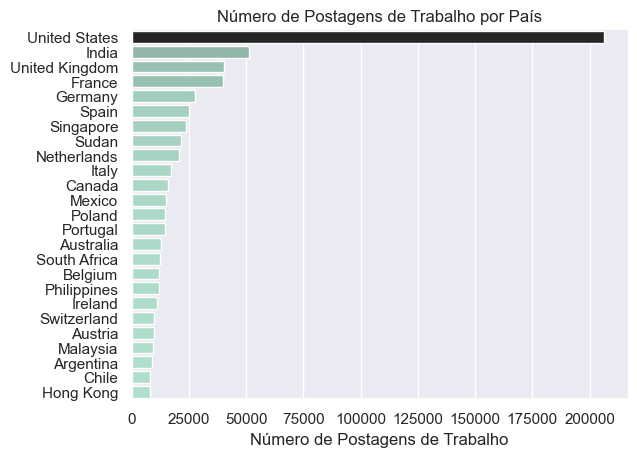

In [6]:
color =  "#a8e6cf"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

sns.set_theme(style='darkgrid')
sns.barplot(data=df_paises, x='count', y='job_country', hue='count', palette=palette, legend=False)
sns.despine()
plt.title("Número de Postagens de Trabalho por País")
plt.ylabel('')
plt.xlabel("Número de Postagens de Trabalho")
plt.show()

## Empresas da Análise

In [7]:
# O intervalo [1:] evita que apareça a soma geral de empregos nos datos
df_empresas = df['company_name'].value_counts().to_frame()[1:].head(25)

df_empresas

,count
company_name,
Booz Allen Hamilton,2879
Dice,2827
Harnham,2547
Insight Global,2254
Citi,2164
Confidenziale,2040
Listopro,1984
Capital One,1946
Walmart,1863


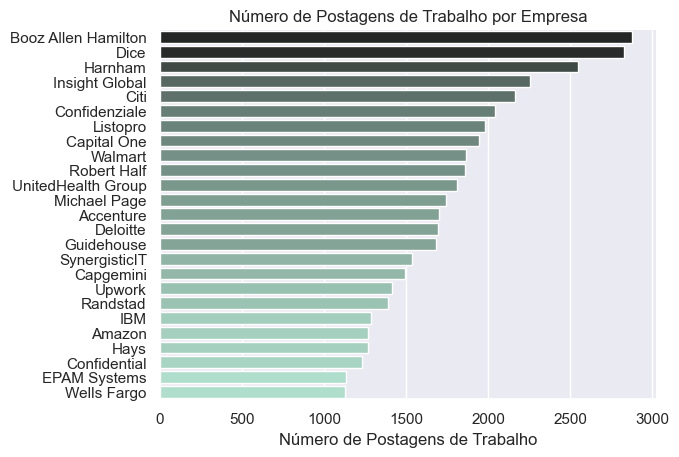

In [8]:
color =  "#a8e6cf"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

sns.set_theme(style='darkgrid')
sns.barplot(data=df_empresas, x='count', y='company_name', hue='count', palette=palette, legend=False)
sns.despine()
plt.title("Número de Postagens de Trabalho por Empresa")
plt.ylabel('')
plt.xlabel("Número de Postagens de Trabalho")
plt.show()

## Tipo/Requisitos de Trabalho

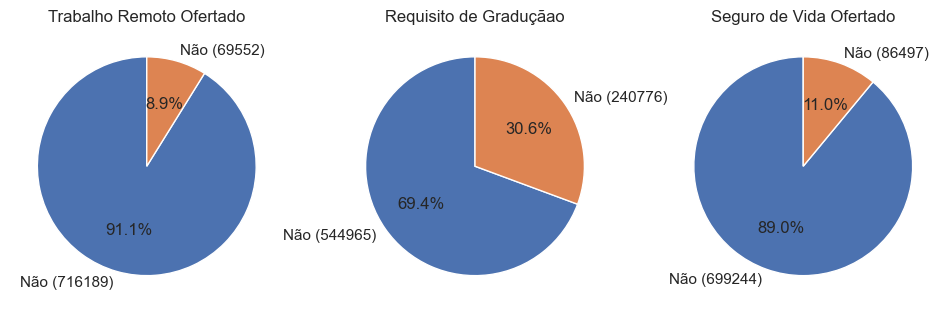

In [9]:
dict_types = {
    'job_work_from_home': 'Trabalho Remoto Ofertado',
    'job_no_degree_mention': 'Requisito de Graduçãao',
    'job_health_insurance': 'Seguro de Vida Ofertado'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, (tipo, titulo) in enumerate(dict_types.items()):
    value_counts = df[tipo].value_counts()
    labels = [f"Sim ({value_counts[index]})" if index == "True" else f"Não ({value_counts[index]})" for index in value_counts.index]
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(titulo)

plt.show()


# Análise Exploratória de Dados (EDA) Para Analistas de Dados na França

In [10]:
# Importando as bibliotecas
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Carregabdo os dados do dataset do Hugging Face e convertendo o conjunto de treino ('train') em um DataFrame do Pandas
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Fazendo tratamento dos dados para o formato datetime e transformando as habilidades (job_skills) em listas
df['job_posted_dates'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filtragem para cargos de analista de dados na França

In [11]:
df_DA_fr = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'France')].copy()

df_DA_fr

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_dates
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",2023-12-22 13:24:41
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},2023-10-19 13:59:31
67,Data Analyst,Stage - Data Analyste Finance H/F,"Paris, France",via Emplois Trabajo.org,Full-time and Internship,False,France,2023-11-07 13:37:53,False,False,France,None,NaN,NaN,Kepler Cheuvreux,[excel],{'analyst_tools': ['excel']},2023-11-07 13:37:53
252,Data Analyst,Analyste de données (Power BI),France,via LinkedIn,Full-time,False,France,2023-11-14 13:37:40,False,False,France,None,NaN,NaN,PRO ADVICE,"[sql, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra...",2023-11-14 13:37:40
466,Data Analyst,Data Analyst / Data Steward H/F,"Île-de-France, France",via Jobijoba,Full-time,False,France,2023-07-25 13:31:21,False,False,France,None,NaN,NaN,Air France,"[sas, sas, python]","{'analyst_tools': ['sas'], 'programming': ['sa...",2023-07-25 13:31:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784785,Data Analyst,[CDI] CRM Data Analyst,France,via Emplois Trabajo.org,Full-time,False,France,2023-07-31 06:52:11,True,False,France,None,NaN,NaN,e-Works,None,None,2023-07-31 06:52:11
785074,Data Analyst,Stage - Data Analyst F/H,"Bois-Colombes, France",via WIZBII,Internship,False,France,2023-01-03 06:32:55,True,False,France,None,NaN,NaN,Stage,None,None,2023-01-03 06:32:55
785094,Data Analyst,Data Analyst,"Cluses, France",via BeBee,Full-time,False,France,2023-01-28 06:14:02,False,False,France,None,NaN,NaN,Somfy,None,None,2023-01-28 06:14:02
785478,Data Analyst,Business Data Analyst H/F,"Aix-en-Provence, France",via BeBee,Full-time,False,France,2023-01-03 06:33:04,False,False,France,None,NaN,NaN,Adsearch,"[sql, python]","{'programming': ['sql', 'python']}",2023-01-03 06:33:04


## Análise da distribuição de vagas por localidade

In [12]:
df_local_fr = df_DA_fr['job_location'].value_counts().to_frame().head(10)

df_local_fr.loc['Anywhere'] = df_local_fr.loc['France'] + df_local_fr.loc['Anywhere']
df_local_fr = df_local_fr.drop('France')

df_local_fr

,count
job_location,
"Paris, France",3786
Anywhere,2161
"Lyon, France",522
"Nanterre, France",319
"Toulouse, France",273
"Boulogne-Billancourt, France",233
"Courbevoie, France",230
"Nantes, France",220
"Bordeaux, France",203


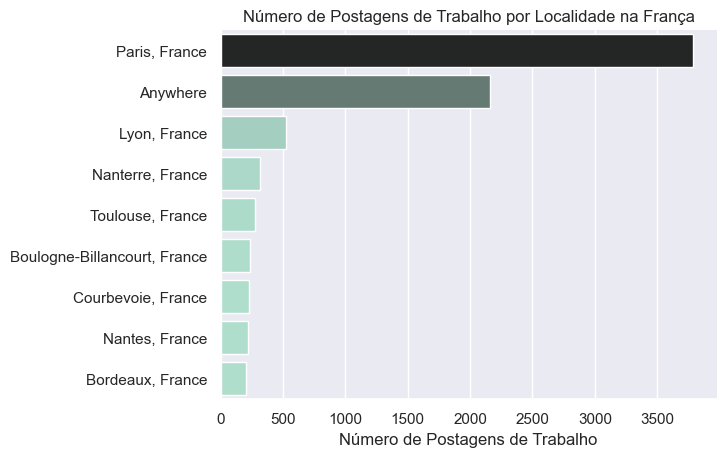

In [13]:
color =  "#a8e6cf"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

sns.set_theme(style='darkgrid')
sns.barplot(data=df_local_fr, x='count', y='job_location', hue='count', palette=palette, legend=False)
sns.despine()
plt.title("Número de Postagens de Trabalho por Localidade na França")
plt.ylabel('')
plt.xlabel("Número de Postagens de Trabalho")
plt.show()

## Análise de vagas por empresa na frança

In [14]:
df_empresas_fr = df_DA_fr['company_name'].value_counts().to_frame().head(10)

df_empresas_fr

,count
company_name,
OpenClassrooms,204
Carrefour,190
Société Générale,103
Michael Page,88
BNP Paribas,77
E-Works,73
CGI,68
Harnham,61
Free-Work (ex Freelance-info Carriere-info),57


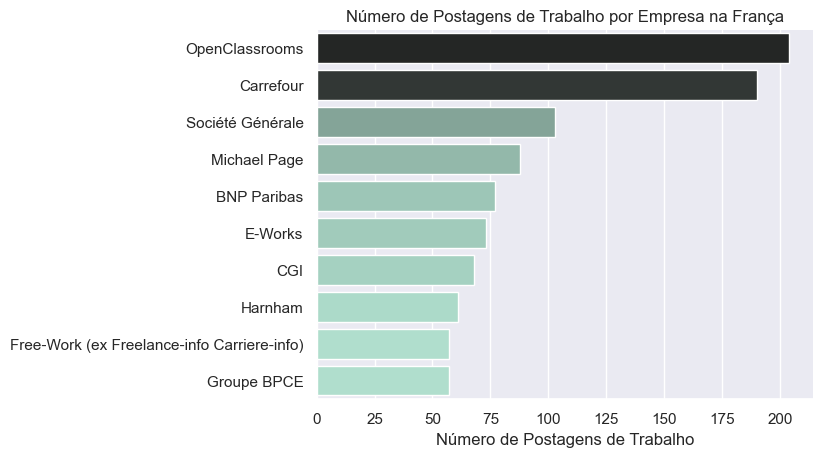

In [15]:
color =  "#a8e6cf"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

sns.set_theme(style='darkgrid')
sns.barplot(data=df_empresas_fr, x='count', y='company_name', hue='count', palette=palette, legend=False)
sns.despine()
plt.title("Número de Postagens de Trabalho por Empresa na França")
plt.ylabel('')
plt.xlabel("Número de Postagens de Trabalho")
plt.show()

## Tipo/Requisitos de Trabalho

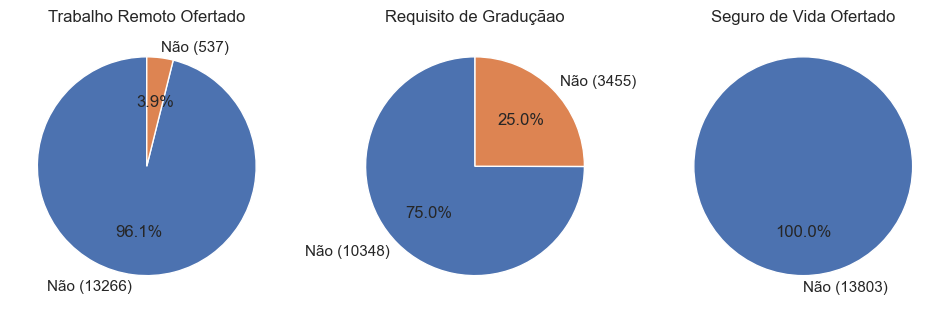

In [16]:
dict_types = {
    'job_work_from_home': 'Trabalho Remoto Ofertado',
    'job_no_degree_mention': 'Requisito de Graduçãao',
    'job_health_insurance': 'Seguro de Vida Ofertado'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, (tipo, titulo) in enumerate(dict_types.items()):
    value_counts = df_DA_fr[tipo].value_counts()
    labels = [f"Sim ({value_counts[index]})" if index == "True" else f"Não ({value_counts[index]})" for index in value_counts.index]
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(titulo)

plt.show()